# Project: Song Challenge

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import normalize

plt.rcParams["patch.force_edgecolor"] = True
sns.set_style('whitegrid')
%matplotlib inline


# Table of Contents
  1. [Read Data](#readdata)
  2. [Question 1](#question1)
  3. [Question 2](#question2)
  4. [Question 3](#question3)
  5. [Question 4](#question4)
  6. [Question 5](#question5)

<a id='read_data'></a>
## Read Data

In [4]:
data = pd.read_json('C:/Users/xiaoj/Desktop/CS/collection of data science-take home challenges/Data/8. song.json')
data.head()

,id,user_id,user_state,user_sign_up_date,song_played,time_played
0,GOQMMKSQQH,122,Louisiana,2015-05-16,Hey Jude,2015-06-11 21:51:35
1,HWKKBQKNWI,3,Ohio,2015-05-01,We Can Work It Out,2015-06-06 16:49:19
2,DKQSXVNJDH,35,New Jersey,2015-05-04,Back In the U.S.S.R.,2015-06-14 02:11:29
3,HLHRIDQTUW,126,Illinois,2015-05-16,P.s. I Love You,2015-06-08 12:26:10
4,SUKJCSBCYW,6,New Jersey,2015-05-01,Sgt. Pepper's Lonely Hearts Club Band,2015-06-28 14:57:00


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 4000 non-null   object
 1   user_id            4000 non-null   int64 
 2   user_state         4000 non-null   object
 3   user_sign_up_date  4000 non-null   object
 4   song_played        4000 non-null   object
 5   time_played        4000 non-null   object
dtypes: int64(1), object(5)
memory usage: 187.6+ KB


In [6]:
# transfer two time-related field from 'object' to time
data['user_sign_up_date'] = pd.to_datetime(data['user_sign_up_date'])
data['time_played'] = pd.to_datetime(data['time_played'])

In [7]:
# check if there are any null or NaN values
data.isnull().sum()

id                   0
user_id              0
user_state           0
user_sign_up_date    0
song_played          0
time_played          0
dtype: int64

In [8]:
# check the unique values
columns=['song_played','user_id','user_state']
[data[column].nunique() for column in columns]

[97, 196, 41]

<a id='Question1'></a>
## Question 1
What are the top 3 and the bottom 3 states in terms of number of users?

In [10]:
state_user_count = data.groupby('user_state')['user_id'].nunique()
state_user_count.sort_values(ascending=False)

user_state
New York          23
California        21
Texas             15
Pennsylvania       9
Ohio               9
Florida            7
Illinois           7
Georgia            6
New Jersey         6
North Carolina     6
Massachusetts      6
Michigan           5
Wisconsin          5
Maryland           5
Louisiana          5
Missouri           5
Tennessee          5
Indiana            4
Minnesota          4
Alabama            4
West Virginia      3
Oregon             3
Colorado           3
Kentucky           3
South Carolina     3
Mississippi        3
Oklahoma           2
Utah               2
Virginia           2
Washington         2
Arkansas           2
Alaska             2
North Dakota       1
Kansas             1
Iowa               1
Rhode Island       1
Nebraska           1
Idaho              1
Connecticut        1
New Mexico         1
Arizona            1
Name: user_id, dtype: int64

In [11]:
# Top 3 state 
state_user_count.iloc[:3]

user_state
Alabama    4
Alaska     2
Arizona    1
Name: user_id, dtype: int64

In [12]:
# Bottom 3 states, since the last 9 states has the same user counts, all of them have been shown here
state_user_count.iloc[-9:]

user_state
Rhode Island       1
South Carolina     3
Tennessee          5
Texas             15
Utah               2
Virginia           2
Washington         2
West Virginia      3
Wisconsin          5
Name: user_id, dtype: int64

C:\Users\xiaoj\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'User Counts')

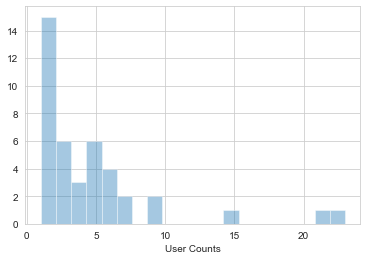

In [13]:
# visualization of distribution of the user counts(method 1)
sns.distplot(state_user_count,bins = 20,kde=False)
plt.xlabel('User Counts')

<a id='question2'></a>
## Question 2
What are the top 3 and the bottom 3 states in terms of user engagement?

Here I define the user engagement is the average play events per user in the State where the sign-up customers are at least equal to be 4.

In [14]:
# create a dataframe that include the state_play_count and state_user_count
state_play_count = data.groupby('user_state')['song_played'].count()

user_play = pd.merge(left=state_user_count, right=state_play_count,on='user_state')

#create the average songs played per user
user_play['average_play'] = round(state_play_count/state_user_count,1)

#sort the user_play according to the 'average_play'
user_play = user_play.sort_values(by='average_play', ascending= False)

# to locate the state where the sign-up users >=4
state_user_play = user_play[user_play['user_id']>=4]
state_user_play

,user_id,song_played,average_play
user_state,,,
Alabama,4,104,26.0
Florida,7,180,25.7
North Carolina,6,154,25.7
Missouri,5,127,25.4
Ohio,9,209,23.2
Georgia,6,135,22.5
Maryland,5,112,22.4
Illinois,7,149,21.3
Louisiana,5,105,21.0


In [15]:
# get the top 3 states
state_user_play.iloc[:3]

,user_id,song_played,average_play
user_state,,,
Alabama,4,104,26.0
Florida,7,180,25.7
North Carolina,6,154,25.7


In [16]:
# get the bottom 3 states
state_user_play.iloc[-3:]

,user_id,song_played,average_play
user_state,,,
Massachusetts,6,91,15.2
Indiana,4,55,13.8
Minnesota,4,42,10.5


<a id='question3'></a>
## Question 3
The CEO wants to send a gift to the first user who signed up for each state. Give hime a list of those users?

In [17]:
data.set_index('id',inplace=True)
data.head()

,user_id,user_state,user_sign_up_date,song_played,time_played
id,,,,,
GOQMMKSQQH,122,Louisiana,2015-05-16,Hey Jude,2015-06-11 21:51:35
HWKKBQKNWI,3,Ohio,2015-05-01,We Can Work It Out,2015-06-06 16:49:19
DKQSXVNJDH,35,New Jersey,2015-05-04,Back In the U.S.S.R.,2015-06-14 02:11:29
HLHRIDQTUW,126,Illinois,2015-05-16,P.s. I Love You,2015-06-08 12:26:10
SUKJCSBCYW,6,New Jersey,2015-05-01,Sgt. Pepper's Lonely Hearts Club Band,2015-06-28 14:57:00


In [24]:
sub_index = data.groupby('user_state')['user_sign_up_date'].idxmin()

data.loc[sub_index,['user_id','user_state','user_sign_up_date','song_played']]

,user_id,user_state,user_sign_up_date,song_played
id,,,,
VYGDSSQBJY,5,Alabama,2015-05-01,I Saw Her Standing There
LYZJSGOGMT,106,Alaska,2015-05-12,Eleanor Rigby
NQIOZURYLR,105,Arizona,2015-05-12,A Day In The Life
PYMWQEHYAR,78,Arkansas,2015-05-08,Yesterday
VGMSPYIOVD,39,California,2015-05-04,Hello Goodbye
RVYFCTFVSR,173,Colorado,2015-05-19,Eleanor Rigby
GFEOXBDCXQ,127,Connecticut,2015-05-16,Lucy In The Sky With Diamonds
TCPQTLEFBY,41,Florida,2015-05-04,Fixing A Hole
DRQEXFLVUJ,20,Georgia,2015-05-02,Get Back


In [38]:
sub_index

user_state
Alabama           VYGDSSQBJY
Alaska            LYZJSGOGMT
Arizona           NQIOZURYLR
Arkansas          PYMWQEHYAR
California        VGMSPYIOVD
Colorado          RVYFCTFVSR
Connecticut       GFEOXBDCXQ
Florida           TCPQTLEFBY
Georgia           DRQEXFLVUJ
Idaho             EIODCPYXVZ
Illinois          SJYWDAFPTE
Indiana           CVDVDPRXBP
Iowa              AMKXQNEPVP
Kansas            LZBFURNTYG
Kentucky          GKAVROKGKZ
Louisiana         DMTICHBHIX
Maryland          RJBVBECGEB
Massachusetts     YEYEFEGHSB
Michigan          FUZEXNGIIH
Minnesota         AUAUMQGGTG
Mississippi       GHDIMXUHCU
Missouri          RJAXELQHQP
Nebraska          NFBYEAOIQD
New Jersey        SUKJCSBCYW
New Mexico        FJHZSNVNSM
New York          YCBBAYWXZW
North Carolina    THXIUMICEM
North Dakota      XTLRIRSLYF
Ohio              HWKKBQKNWI
Oklahoma          NWTWIRGPTP
Oregon            ECUPTRAWWI
Pennsylvania      FDYRTNRNLB
Rhode Island      HZICITYVPP
South Carolina    ZKBGWMSCET
Ten

In [39]:
subdata = data.groupby('user_state')['user_sign_up_date'].min()
subdata

user_state
Alabama          2015-05-01
Alaska           2015-05-12
Arizona          2015-05-12
Arkansas         2015-05-08
California       2015-05-04
Colorado         2015-05-19
Connecticut      2015-05-16
Florida          2015-05-04
Georgia          2015-05-02
Idaho            2015-05-19
Illinois         2015-05-05
Indiana          2015-05-12
Iowa             2015-05-19
Kansas           2015-05-19
Kentucky         2015-05-04
Louisiana        2015-05-06
Maryland         2015-05-02
Massachusetts    2015-05-02
Michigan         2015-05-02
Minnesota        2015-05-02
Mississippi      2015-05-02
Missouri         2015-05-09
Nebraska         2015-05-16
New Jersey       2015-05-01
New Mexico       2015-05-01
New York         2015-05-02
North Carolina   2015-05-01
North Dakota     2015-05-17
Ohio             2015-05-01
Oklahoma         2015-05-16
Oregon           2015-05-01
Pennsylvania     2015-05-02
Rhode Island     2015-05-19
South Carolina   2015-05-08
Tennessee        2015-05-08
Texas    

<a id='question4'></a>
## Question 4
Build a function that takes as an input any of the songs in the data and returns the most likely song to be listened next. That is, if, for instance, a user is currently listening to "Eight Days A Week", which song has the highest probability of being played right after it by the same user? This is going to be v1 of a song recommendation model.

To give the song recommendation, I will choose the 'Collaborative Filtering' algorithm, which means if two songs are both liked by the same set of users, then they must be similar.

In [73]:
data = data.reset_index()

In [74]:
rec_data = pd.DataFrame(data.groupby('song_played')['user_id'].count())

rec_data['count of people'] = data.groupby('song_played')['user_id'].nunique()
rec_data = rec_data.rename(columns={'user_id':"play counts"})
rec_data.sort_values(by = 'play counts',ascending = False)

,play counts,count of people
song_played,,
Come Together,408,150
Revolution,321,141
Get Back,279,138
A Day In The Life,189,104
Let It Be,184,109
...,...,...
When I'm 64,3,3
THE CONTINUING STORY OF BUNG,2,2
I'm Down,2,2


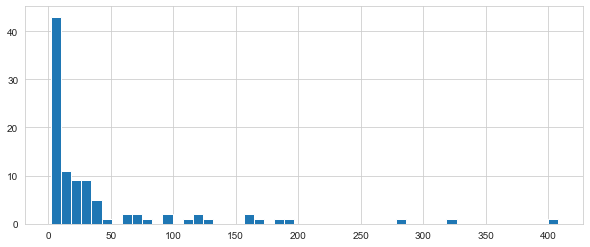

In [75]:
plt.figure(figsize=(10,4))
rec_data['play counts'].hist(bins=50)

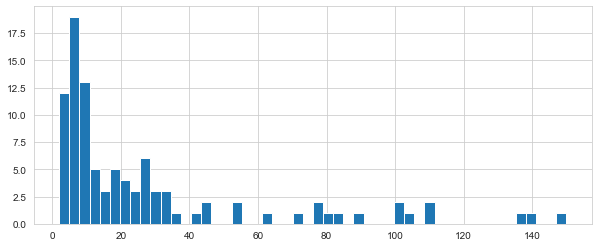

In [76]:
plt.figure(figsize=(10,4))
rec_data['count of people'].hist(bins=50)

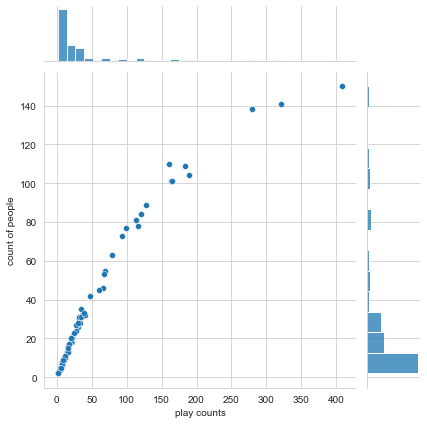

In [77]:
sns.jointplot(x='play counts',y='count of people',data=rec_data)

In [78]:
# build the song-user relationship table-method 1(step 1)
per_count=pd.DataFrame(data.groupby(['song_played','user_id'])['id'].count())
per_count.sort_values('id',ascending=False)

id
song_played                    user_id    
Revolution                     96       10
Come Together                  55        8
                               85        8
                               98        8
                               35        7
...                                     ..
Here Comes The Sun             37        1
                               33        1
                               32        1
                               27        1
You're Going To Lose That Girl 70        1

[2743 rows x 1 columns]

In [80]:
# build the song-user relationship table-method 1(step 2)
song_user = data.groupby(['song_played','user_id'])['id'].count().unstack(fill_value=0)
song_user

user_id,1,2,3,4,5,6,7,8,9,10,...,191,192,193,194,195,196,197,198,199,200
song_played,,,,,,,,,,,,,,,,,,,,,
A Day In The Life,0,0,1,3,0,2,0,0,0,0,...,0,0,3,3,0,2,0,0,2,0
A Hard Day's Night,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
A Saturday Club Xmas/Crimble Medley,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ANYTIME AT ALL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Across The Universe,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YOUR MOTHER SHOULD KNOW,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yellow Submarine,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Yesterday,1,1,0,0,0,0,0,0,1,0,...,1,1,1,1,2,2,0,0,0,1


- per_count=pd.DataFrame(data.groupby(['song_played','user_id'])['id'].count())
- per_count.pivot_table(index='song_played',columns='user_id',fill_value=0)


- song_user = data.groupby(['song_played','user_id'])['id'].count().unstack(fill_value=0)

**the following methods are same to get the same results**

In [84]:
per_count=pd.DataFrame(data.groupby(['song_played','user_id'])['id'].count())
per_count.pivot_table(index='song_played',columns='user_id',fill_value=0)

id                                      \
user_id                             1   2   3   4   5   6   7   8   9   10    
song_played                                                                   
A Day In The Life                     0   0   1   3   0   2   0   0   0   0   
A Hard Day's Night                    0   0   0   0   0   1   0   0   1   0   
A Saturday Club Xmas/Crimble Medley   0   0   0   0   0   0   0   0   0   0   
ANYTIME AT ALL                        0   0   0   0   0   0   0   0   0   0   
Across The Universe                   0   0   0   1   0   0   0   0   0   0   
...                                  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
YOUR MOTHER SHOULD KNOW               0   0   0   0   0   0   0   0   0   0   
Yellow Submarine                      0   0   0   0   0   0   1   0   0   0   
Yesterday                             1   1   0   0   0   0   0   0   1   0   
You Never Give Me Your Money          0   1   0   0   0   0   0   0   0   0   
You're Going To Lose That Girl        0   0   0   0   0   0   0   0   0   0   

                                     ...                                      \
user_id                              ... 191 192 193 194 195 196 197 198 199   
song_played                          ...                                       
A Day In The Life                    ...   0   0   3   3   0   2   0   0   2   
A Hard Day's Night                   ...   0   0   0   0   1   0   0   0   0   
A Saturday Club Xmas/Crimble Medley  ...   0   0   0   0   0   0   0   0   0   
ANYTIME AT ALL                       ...   0   0   0   0   0   0   0   0   0   
Across The Universe                  ...   0   0   0   0   0   0   0   0   0   
...                                  ...  ..  ..  ..  ..  ..  ..  ..  ..  ..   
YOUR MOTHER SHOULD KNOW              ...   0   0   0   0   0   0   0   0   0   
Yellow Submarine                     ...   0   0   1   0   0   0   0   0   0   
Yesterday                            ...   1   1   1   1   2   2   0   0   0   
You Never Give Me Your Money         ...   0   0   0   0   0   0   0   0   0   
You're Going To Lose That Girl       ...   0   0   0   0   0   0   0   0   0   

                                         
user_id                             200  
song_played                              
A Day In The Life                     0  
A Hard Day's Night                    0  
A Saturday Club Xmas/Crimble Medley   0  
ANYTIME AT ALL                        0  
Across The Universe                   0  
...                                  ..  
YOUR MOTHER SHOULD KNOW               0  
Yellow Submarine                      0  
Yesterday                             1  
You Never Give Me Your Money          0  
You're Going To Lose That Girl        0  

[97 rows x 196 columns]

In [85]:
matrix=pd.DataFrame(data.groupby(['song_played','user_id'])['id'].count())

# values='id' need to be filled, otherwise the frame will have id before column names
matrix.pivot_table(index='user_id',columns='song_played',values='id',fill_value=0)

song_played,A Day In The Life,A Hard Day's Night,A Saturday Club Xmas/Crimble Medley,ANYTIME AT ALL,Across The Universe,All My Loving,All You Need Is Love,And Your Bird Can Sing,BAD BOY,Baby You're A Rich Man,...,We Can Work It Out,When I'm 64,While My Guitar Gently Weeps,Wild Honey Pie,With a Little Help From My Friends,YOUR MOTHER SHOULD KNOW,Yellow Submarine,Yesterday,You Never Give Me Your Money,You're Going To Lose That Girl
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,3,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,2,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,2,0,0
197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
198,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0


In [91]:
# build the song-user relationship table-method 2(step 1)
matrix=pd.DataFrame(data.groupby(['song_played','user_id'])['id'].count())

# values='id' need to be filled, otherwise the frame will have id before column names
matrix_t=matrix.pivot_table(index='user_id',columns='song_played',values='id',fill_value=0)
matrix_t.corrwith(matrix_t['Come Together'])

corr_come_together = pd.DataFrame(matrix_t.corrwith(matrix_t['Come Together']),columns=['correlation'])
corr_come_together.dropna(inplace=True)
corr_come_together.sort_values(by='correlation',ascending=False).head(10)

,correlation
song_played,
Come Together,1.000000
Strawberry Fields Forever,0.330876
Revolution,0.290813
Let It Be,0.279058
Hey Jude,0.268997
I've Just Seen A Face,0.240356
Things We Said Today,0.231925
I Feel Fine,0.217146
Back In the U.S.S.R.,0.216235


In [88]:
# build the song-user relationship table-method 2(step 1)
matrix=pd.DataFrame(data.groupby(['song_played','user_id'])['id'].count())

# values='id' need to be filled, otherwise the frame will have id before column names
matrix_t=matrix.pivot_table(index='user_id',columns='song_played',values='id',fill_value=0)
matrix_t.corrwith(matrix_t['A Day In The Life'])

corr_come_together = pd.DataFrame(matrix_t.corrwith(matrix_t['A Day In The Life']),columns=['correlation'])
corr_come_together.dropna(inplace=True)
corr_come_together.sort_values(by='correlation',ascending=False).head(10)

,correlation
song_played,
A Day In The Life,1.000000
Revolution,0.243070
Penny Lane,0.206884
I Am the Walrus,0.206606
Reprise / Day in the Life,0.201798
All You Need Is Love,0.189131
Hey Jude,0.187808
She's Leaving Home,0.187418
While My Guitar Gently Weeps,0.186235


In [86]:
# # build the song-user relationship table-method 2(step 2)
song_user = data.groupby(['song_played','user_id'])['id'].count().unstack(fill_value=0)
song_user = (song_user).astype(int)
song_user.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,191,192,193,194,195,196,197,198,199,200
song_played,,,,,,,,,,,,,,,,,,,,,
A Day In The Life,0,0,1,3,0,2,0,0,0,0,...,0,0,3,3,0,2,0,0,2,0
A Hard Day's Night,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
A Saturday Club Xmas/Crimble Medley,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ANYTIME AT ALL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Across The Universe,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
# build song-song similarity table
# normalize the song-user matrix
song_user_norm = normalize(song_user, axis = 1)

# calculate the similarity matrix
similarity = np.dot(song_user_norm, song_user_norm.T)

similarity = pd.DataFrame(similarity, index=song_user.index, columns=song_user.index)
similarity

song_played,A Day In The Life,A Hard Day's Night,A Saturday Club Xmas/Crimble Medley,ANYTIME AT ALL,Across The Universe,All My Loving,All You Need Is Love,And Your Bird Can Sing,BAD BOY,Baby You're A Rich Man,...,We Can Work It Out,When I'm 64,While My Guitar Gently Weeps,Wild Honey Pie,With a Little Help From My Friends,YOUR MOTHER SHOULD KNOW,Yellow Submarine,Yesterday,You Never Give Me Your Money,You're Going To Lose That Girl
song_played,,,,,,,,,,,,,,,,,,,,,
A Day In The Life,1.000000,0.246021,0.067651,0.108483,0.192538,0.341760,0.322896,0.138092,0.223237,0.175762,...,0.462712,0.055237,0.509397,0.225503,0.427027,0.033826,0.331593,0.339179,0.079727,0.0
A Hard Day's Night,0.246021,1.000000,0.000000,0.000000,0.100000,0.136931,0.111803,0.000000,0.000000,0.091287,...,0.259548,0.129099,0.210099,0.000000,0.112987,0.000000,0.050000,0.195468,0.074536,0.0
A Saturday Club Xmas/Crimble Medley,0.067651,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.109435,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
ANYTIME AT ALL,0.108483,0.000000,0.000000,1.000000,0.000000,0.154303,0.094491,0.109109,0.000000,0.000000,...,0.116991,0.000000,0.138107,0.089087,0.190982,0.000000,0.000000,0.146845,0.000000,0.0
Across The Universe,0.192538,0.100000,0.000000,0.000000,1.000000,0.091287,0.000000,0.000000,0.000000,0.000000,...,0.138426,0.000000,0.116722,0.000000,0.075324,0.000000,0.000000,0.043437,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YOUR MOTHER SHOULD KNOW,0.033826,0.000000,0.000000,0.000000,0.000000,0.144338,0.088388,0.102062,0.000000,0.000000,...,0.164153,0.204124,0.092277,0.000000,0.208422,1.000000,0.079057,0.068680,0.000000,0.0
Yellow Submarine,0.331593,0.050000,0.000000,0.000000,0.000000,0.273861,0.111803,0.258199,0.000000,0.182574,...,0.224942,0.000000,0.326821,0.158114,0.244804,0.079057,1.000000,0.195468,0.074536,0.0
Yesterday,0.339179,0.195468,0.000000,0.146845,0.043437,0.178437,0.291386,0.112154,0.064752,0.000000,...,0.413382,0.168232,0.436026,0.274721,0.417165,0.068680,0.195468,1.000000,0.259010,0.0


In [162]:
# find the most similar songs of each song and its similar score
def most_similar_song(song, topk):
    similar_ones = song.sort_values(ascending = False)[1:topk+1].index
    return pd.Series(similar_ones,index=['Similar #{}'.format(i) for i in range(1,topk+1)])

def most_similar_song_score(song, topk):
    similar_ones_score = song.sort_values(ascending = False)[1:topk+1].values
    return pd.Series(similar_ones_score)

recommendation = similarity.apply(most_similar_song, topk=1, axis=1)
recommendation['score']=similarity.apply(most_similar_song_score, topk=1, axis=1)

recommendation

,Similar #1,score
song_played,,
A Day In The Life,Revolution,0.710186
A Hard Day's Night,Come Together,0.346891
A Saturday Club Xmas/Crimble Medley,GIRL,0.353553
ANYTIME AT ALL,Revolution,0.222812
Across The Universe,Birthday,0.225374
...,...,...
YOUR MOTHER SHOULD KNOW,Sgt. Pepper Inner Groove,0.269680
Yellow Submarine,Reprise / Day in the Life,0.361814
Yesterday,Come Together,0.538341


In [148]:
# find the top k most similar songs of each song
def most_similar_song(s, topk):
    similar_ones = s.sort_values(ascending = False)[1:topk+1].index
    similar_scores = s.sort_values(ascending = False)[1:topk+1].values
    return pd.Series(similar_ones,index=['Similar #{}'.format(i) for i in range(1,topk+1)])

recommendation = similarity.apply(most_similar_song, topk=3,axis=1)
recommendation

,Similar #1,Similar #2,Similar #3
song_played,,,
A Day In The Life,Revolution,Come Together,Get Back
A Hard Day's Night,Come Together,Back In the U.S.S.R.,We Can Work It Out
A Saturday Club Xmas/Crimble Medley,GIRL,IT WON'T BE LONG,I Want You (She's So Heavy)
ANYTIME AT ALL,Revolution,Helter Skelter,Come Together
Across The Universe,Birthday,LITTLE CHILD,Love Me Do
...,...,...,...
YOUR MOTHER SHOULD KNOW,Sgt. Pepper Inner Groove,When I'm 64,Cry For A Shadow
Yellow Submarine,Reprise / Day in the Life,Get Back,Eleanor Rigby
Yesterday,Come Together,With a Little Help From My Friends,Get Back


<a id='question5'></a>
## Question 5
How would you set up a test to check whether your model works well and is improving engagement?

To test whether my model works well and is improving engagement, I need to perform a A/B test:
1. Randomly split users into two groups, the control group and experiment group;
2. For control group, there will be no recommendation strategy
3. For experiment group,recommend the song calcaulated by the model
4. After running for >= 14 days and less than 30 days, perform a one-tailed t-test on the metric-'average plays per users'to see if the experiment is statistical significance:

     - H0: the average plays per users has no difference in two groups;
     
     - HA: The average plays per users in experiment groups are higher than that in control groups.
    